In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.optimize as so 

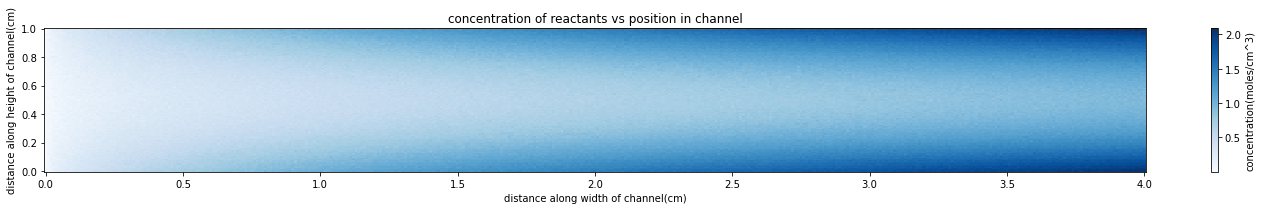

In [16]:
chandata=np.loadtxt('channeldata.csv',delimiter=',')
ny,nx = chandata.shape
xx=np.linspace(0,4,nx)
yy=np.linspace(0,1,ny)
xgrid, ygrid = np.meshgrid(xx,yy)
plt.axes([0, 0, 3, 0.5])

# surface plot
conc = plt.pcolormesh(xgrid,ygrid,chandata,shading='auto',cmap='Blues')
cbar = plt.colorbar(conc,fraction=0.1)
plt.title("concentration of reactants vs position in channel")
plt.xlabel('distance along width of channel(cm)')
plt.ylabel('distance along height of channel(cm)')
cbar.set_label('concentration(moles/cm^3)')
# pick viewing angle

plt.show()

coefficient of A is 0.68


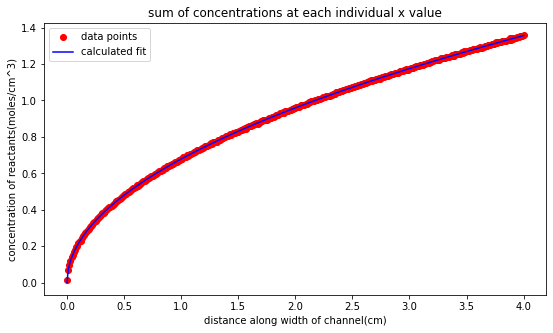

In [12]:
#part b
#creat empty array to input average at each x between (0,4,0.1)
avg = []

#create loop for above interval to gather all y terms at each x point and sum them together. add them to the end of the avg array
for i in range(0,401, 1):
    x_sum=np.mean(chandata[:,i])
    avg= np.append(avg, x_sum)

#create function by squaring each x term; A is the unknown coefficient given for <C> =Asqrt(x)
xcomp = np.sqrt(xx)
#use polyfit to give coefficient of each x**n in a polynomial function; only one coefficient given by function
coef = np.polyfit(xcomp, avg, 1)
#polyval inserts specific point into given function(in this case inputting each x point into the polyfit function)
avg1 = np.polyval(coef, xcomp)
print('coefficient of A is %.2f' %coef[0])

#plot stuff
plt.figure(figsize=(9,5))
plt.plot(xx,avg, 'ro')
plt.plot(xx,avg1, 'b-')
plt.title('sum of concentrations at each individual x value')
plt.xlabel('distance along width of channel(cm)')
plt.ylabel('concentration of reactants(moles/cm^3)')
plt.legend((['data points', 'calculated fit']))

In [13]:
#part c
#determine grid spacing for both x and y
hx=xx[1]-xx[0]
hy = yy[1]-yy[0]

# initialize
dCdx=np.zeros(chandata.shape) 
dCdy=np.zeros(chandata.shape)

# first column: one-sided difference for x-derivatives
dCdx[:,0]=(-3*chandata[:,0]+4*chandata[:,1]-1*chandata[:,2])/(hx**2)
# last column: one-sided difference for x-derivatives
dCdx[:,-1]=(3*chandata[:,-1]-4*chandata[:,-2]+1*chandata[:,-3])/(hx**2)
# all other columns, vectorized
dCdx[:,1:-1]=(chandata[:,2:]-chandata[:,:-2])/(hx**2)

# first row: one-sided difference for y-derivatives
dCdy[0,:]=(-3*chandata[0,:]+4*chandata[1,:]-chandata[2,:])/(2*hy)
# last row: one-sided difference for y-derivatives
dCdy[-1,:]=(3*chandata[-1,:]-4*chandata[-2,:]+chandata[-3,:])/(2*hy)
# all other rows, vectorized
dCdy[1:-1,:]=(chandata[2:,:]-chandata[:-2,:])/(2*hy)
print(dCdx)
print(dCdy)

[[  226.64223757   624.86892373   987.96235833 ...  -277.62501192
     10.30508019  1384.28341118]
 [ 1762.65262745   881.89234824   827.72897903 ...   133.90428461
    307.85852736  -561.51644357]
 [ 2758.54940099   876.71147246   916.70739642 ...    25.4529108
   -169.10671101  -500.85963725]
 ...
 [  270.37108216  1407.46247445  1093.49390295 ...  -247.62430019
   -254.29682881  1176.79255226]
 [ 1483.93334456  1321.9700144    816.78643298 ...  -711.0909904
    112.8472706    886.63884131]
 [ 3184.42551283  1385.99892238   318.54087091 ...   156.06667631
    202.62191856 -1315.91525766]]
[[-4.07346925e+00  1.41201268e+00 -1.92213502e-01 ... -1.03080958e+01
   2.20057061e+00 -3.45996788e+00]
 [-2.49228080e+00  9.87406342e-01 -1.23306805e+00 ... -3.42737461e+00
  -1.74374002e+00 -4.32443357e+00]
 [ 2.76442910e-01 -1.45767921e-01  1.14415715e+00 ... -2.12404348e+00
  -4.69884938e+00 -3.51299344e+00]
 ...
 [ 3.48340441e-02 -1.11604474e-01  1.51836083e-02 ...  4.79970839e+00
   1.8527727

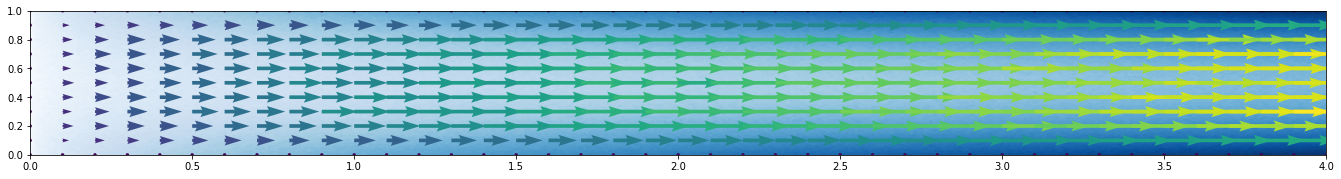

[[   0.            0.            0.         ...    0.
     0.            0.        ]
 [  11.7640909    37.94508616   46.68702789 ...  795.57062248
   810.27303353  807.76182016]
 [   9.94930067   81.20041379   78.68348011 ... 1575.1709212
  1575.04429548 1561.91295505]
 ...
 [   8.28216495   41.16770266  118.62722294 ... 1575.35680253
  1537.33901498 1555.41993116]
 [   8.72087446   36.49931772   61.07088703 ...  805.43840669
   800.0122461   809.9071586 ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]
[[-2.26642238e+01 -6.24868924e+01 -9.87962358e+01 ...  2.77625012e+01
  -1.03050802e+00 -1.38428341e+02]
 [-1.64501172e+02 -5.02441487e+01 -3.60858700e+01 ...  7.82180194e+02
   7.79487181e+02  8.63913465e+02]
 [-2.65905639e+02 -6.47073346e+00 -1.29872595e+01 ...  1.57262563e+03
   1.59195497e+03  1.61199892e+03]
 ...
 [-1.87549433e+01 -9.95785448e+01  9.27783265e+00 ...  1.60011923e+03
   1.56276870e+03  1.43774068e+03]
 [-1.39672460e+02 -9.5697683

In [14]:
#part d
d=.1  #mass diffusity constant
cu=np.zeros([101,401]) #concentration flux(cm**2/s)
u=np.zeros([101,401])  #horizontal flow velocity(cm/s)
for i in range(0,401,1): #vertical component increasing with increments of 0.01cm
    for j in range(0,101,1): #horizontal component increasing with increments of 0.01cm
        u[j][i]=4*(j)*(100-j)  #U(x,y) given in problem statement
        cu[j][i]=u[j][i]*chandata[j][i]  #U(x,y) times the concentration given at each (x,y) in file
qx=-d*dCdx+cu  #use first derivative with respect to x and add the concentration flux
qy=-d*dCdy #use first derivative with respect y 
q=np.sqrt(qx**2+qy**2)  

#plot original grid from part a
plt.axes([0, 0, 3, 0.5])
concentration=plt.contourf(xgrid,ygrid,chandata,100,cmap='Blues')
#plot quiver lines
plt.quiver(xgrid[::10,::10],ygrid[::10,::10],qx[::10,::10],qy[::10,::10],q[::10,::10])
plt.show()
print(cu)
print(qx)

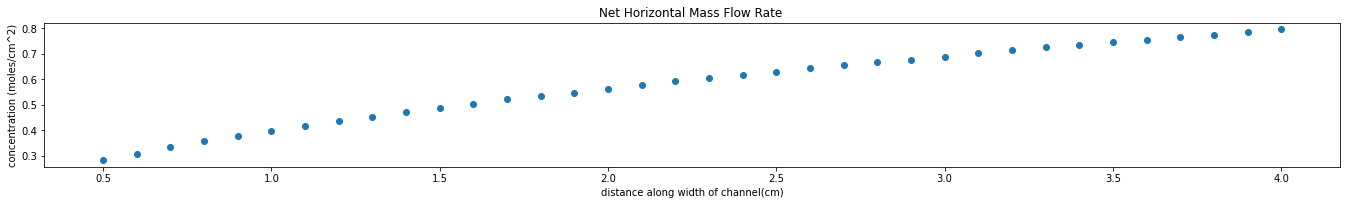

In [15]:
#part e
#state steps of dy
dy=0.01
#create empty array for the net horizontal mass flow rate of proaduct
flux=[]

#create loop for x between 0.5 cm to 4cm; this is y = 0 and y=L_y in the integral
#sum the concentration flux for the partial x axis and multiple it by the step of dy and add the sum tot he end of the empty flux loop
for i in range(50,410,10):
    z=(np.sum(qx[:,i])*dy)/10000  #divide by 10,000 to convert back into cm^2 units
    flux=np.append(flux,z)
#define integral for x
xsetup=np.arange(.50,4.10,.10)
#make a scatter plot of x from range 0.5 to 4 with steps of 0.1 vs the horizontal mass flow rate
plt.axes([0, 0, 3, 0.5])
plt.scatter(xsetup,flux)
plt.title("Net Horizontal Mass Flow Rate ")
plt.xlabel('distance along width of channel(cm)')
plt.ylabel('concentration (moles/cm^2)')
plt.show()